In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
netflix = pd.read_csv("reading_data/netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
netflix.shape

(8807, 12)

In [9]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
netflix.isnull().sum() #eksik veri

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [19]:
netflix.nunique()  #tek farklı veriler

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [31]:
data = netflix.copy()

In [32]:
data.shape

(8807, 12)

In [38]:
data.dropna(inplace = True) # inplace true kopyayı düzenler

In [62]:
data.shape

(5332, 12)

sns.countplot(netflix["type"])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("tür")

bu kodlar çalışmıyor 

In [65]:
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

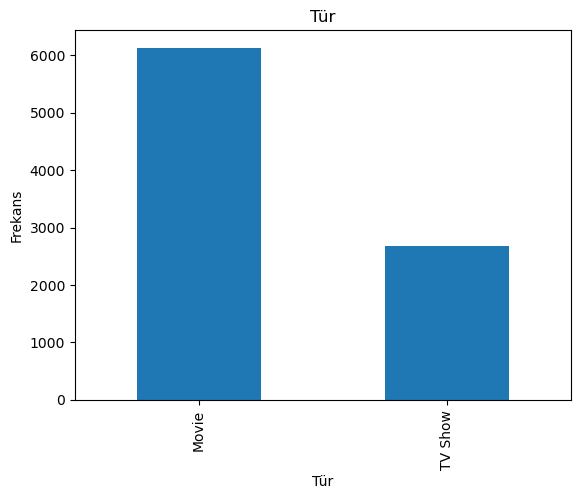

In [84]:
#pandas ile görselleştirme
netflix["type"].value_counts().plot(kind='bar')
plt.title("Tür")
plt.xlabel("Tür")
plt.ylabel("Frekans")
plt.show()

#kind:
#'line': Çizgi grafiği.
#'barh': Yatay çubuk grafiği.
#'hist': Histogram.
#'box': Kutu grafiği.
#'kde': Yoğunluk tahmini grafiği (Kernel Density Estimation).
#'area': Alan grafiği.
#'pie': Pasta grafiği.
#'scatter': Nokta grafiği.

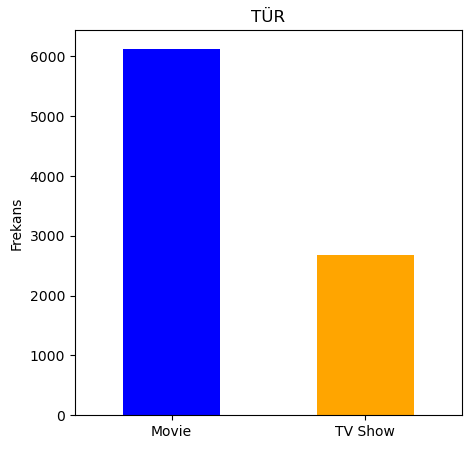

In [135]:
#matplotlib ile görselleştirme
plt.figure(figsize=(5, 5))
netflix["type"].value_counts().plot(kind='bar', color = ["blue","orange"])
plt.title("TÜR")
plt.xticks(fontsize=10, rotation=0)  #bar altındaki yazı
plt.ylabel("Frekans")
plt.show()


# Arka plan ve çizgi ekleme
# plt.gca().set_facecolor('black')
# plt.grid(color='white', linestyle='--', linewidth=1)

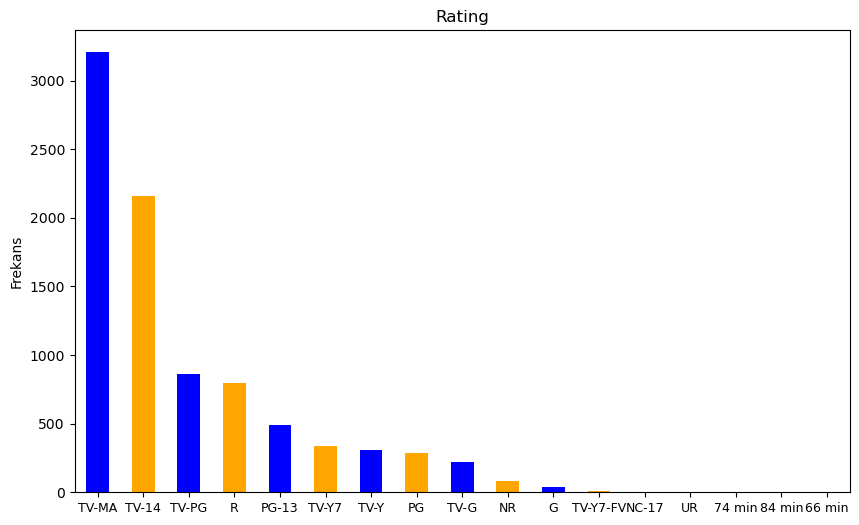

In [154]:
plt.figure(figsize=(10, 6))
netflix["rating"].value_counts().plot(kind='bar', color = ["blue","orange"])
plt.title("Rating")
plt.xticks(fontsize=9, rotation=0)  #bar altındaki yazı
plt.ylabel("Frekans")
plt.show()

In [145]:
# sns.countplot(netflix["rating"])
# sns.countplot(netflix["rating"]).set_xticklabels(sns.countplot(netflix["rating"]).get_xticklabels(),rotation=90,ha="right")
# fig = plt.gcf()
# fig.set_size_inches(13,13)
# plt.title("rating")  

# çalışmayan kod

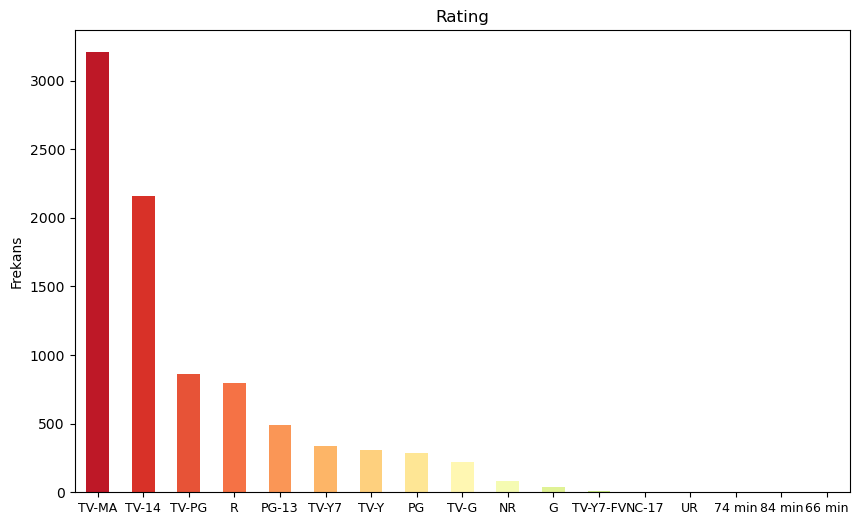

In [182]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("RdYlGn", len(netflix["rating"].unique()))
# colors = sns.color_palette("bright") burada normal oluşturur üstte unique

netflix["rating"].value_counts().plot(kind='bar', color = colors)

plt.title("Rating")
plt.xticks(fontsize=9, rotation=0)  #bar altındaki yazı
plt.ylabel("Frekans")
plt.show()

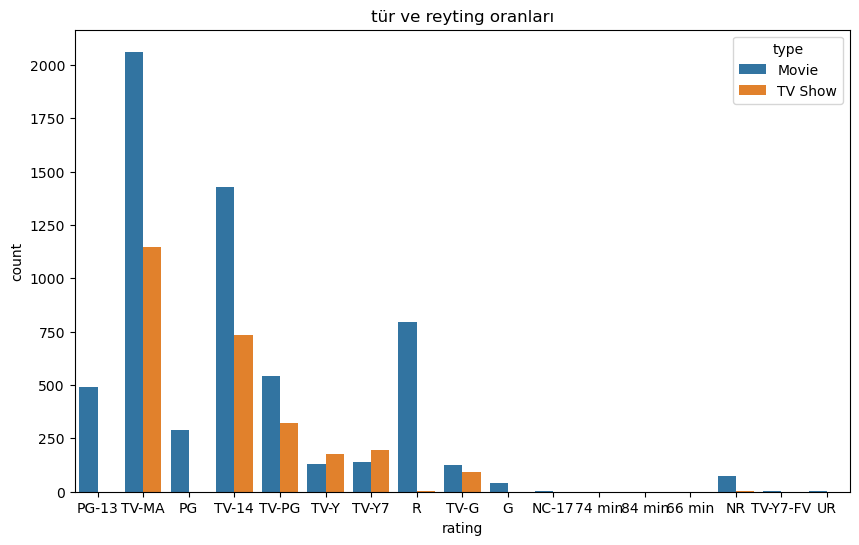

In [226]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "rating", hue = "type", data = netflix)
plt.title("tür ve reyting oranları")
plt.show()

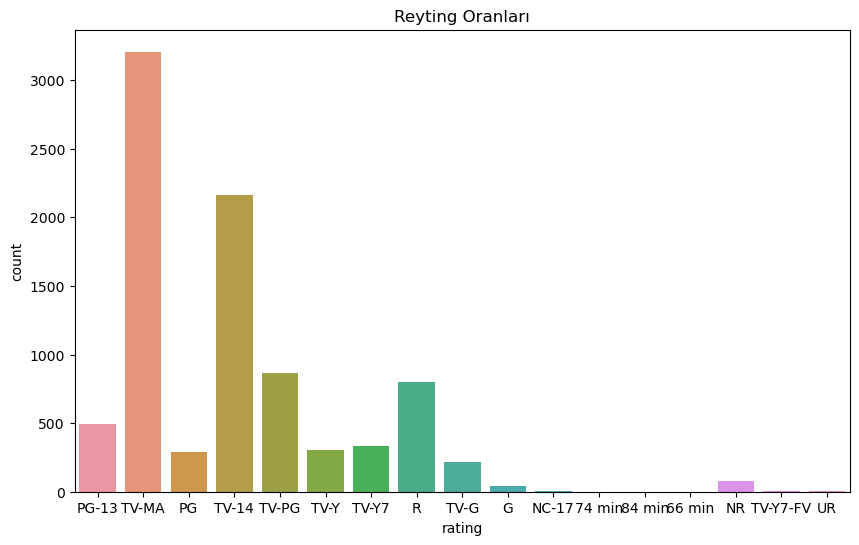

In [228]:
#DENEME
#DENEME
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", data=netflix)
plt.title("Reyting Oranları")
# plt.style.use('default') stil bozulduğunda kullanılır
plt.show()

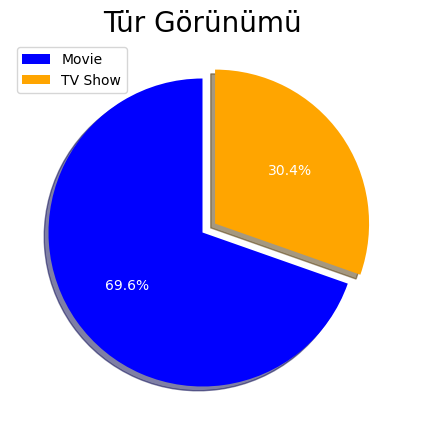

In [299]:
#KENDİ YAPTIĞIM
labels = ["Movie","TV Show"]
plt.figure(figsize=(5, 5))
netflix["type"].value_counts().plot(labels = labels ,kind='pie',colors=['blue', 'orange'], autopct='%1.1f%%', explode=(0, 0.1), shadow=True,textprops={'color': 'white'},startangle=90)
plt.title("Tür Görünümü", fontsize = 20)
plt.ylabel("")
plt.legend()
plt.show()

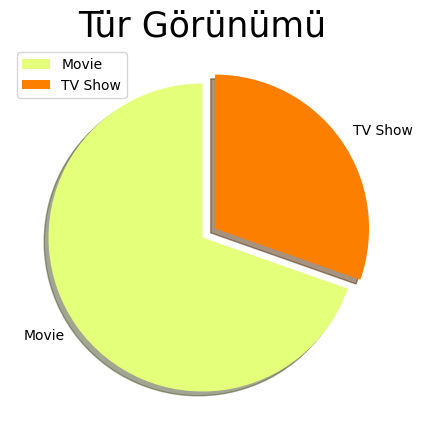

In [294]:
#VİDEO
labels = ["Movie","TV Show"]
size = netflix["type"].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,2))
explode=[0,0.1]
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,startangle=90)
plt.title("Tür Görünümü", fontsize=25)
plt.legend()
plt.show()

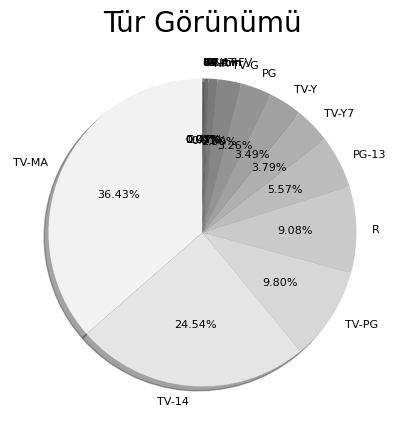

In [350]:
#KENDİ YAPTIĞIM
plt.figure(figsize=(5, 5))
colors = sns.color_palette("binary", len(netflix["rating"].unique()))
netflix["rating"].value_counts().plot(kind='pie',colors=colors, autopct='%1.2f%%',shadow=True,textprops={'color': 'black','fontsize': 8},startangle=90)
plt.title("Tür Görünümü", fontsize = 20)
plt.ylabel("")
plt.show()

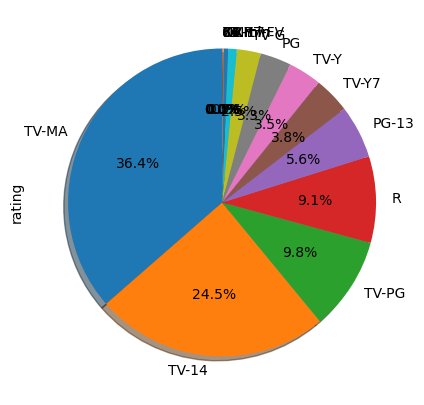

In [348]:
netflix["rating"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(5,5),startangle=90)
plt.show()

In [355]:
from wordcloud import WordCloud

In [354]:
pip install WordCloud

  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/300.2 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/300.2 kB 1.7 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


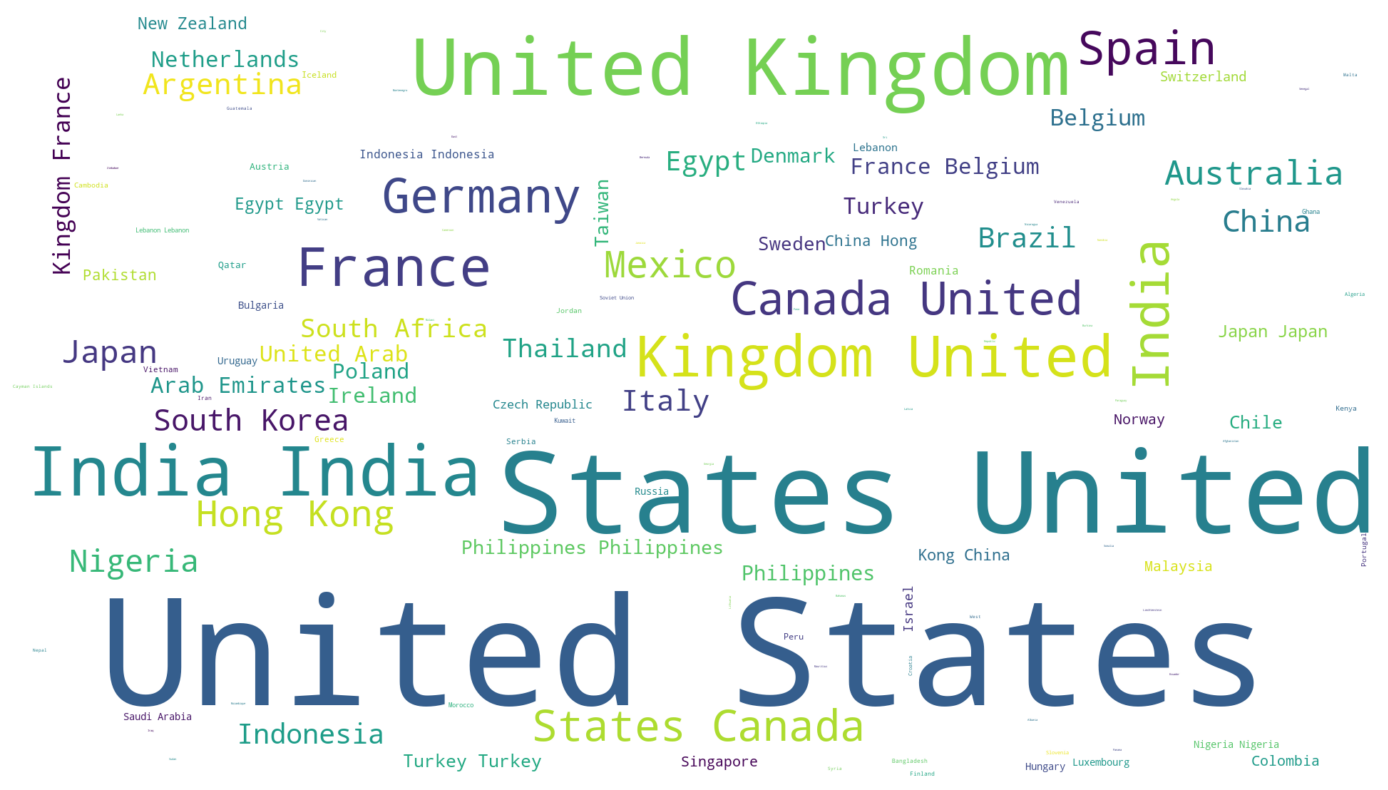

In [363]:
plt.subplots(figsize=(20, 10))
wordcloud = WordCloud(
    background_color="white",
    width=1920,
    height=1080
).generate(" ".join(data.country))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

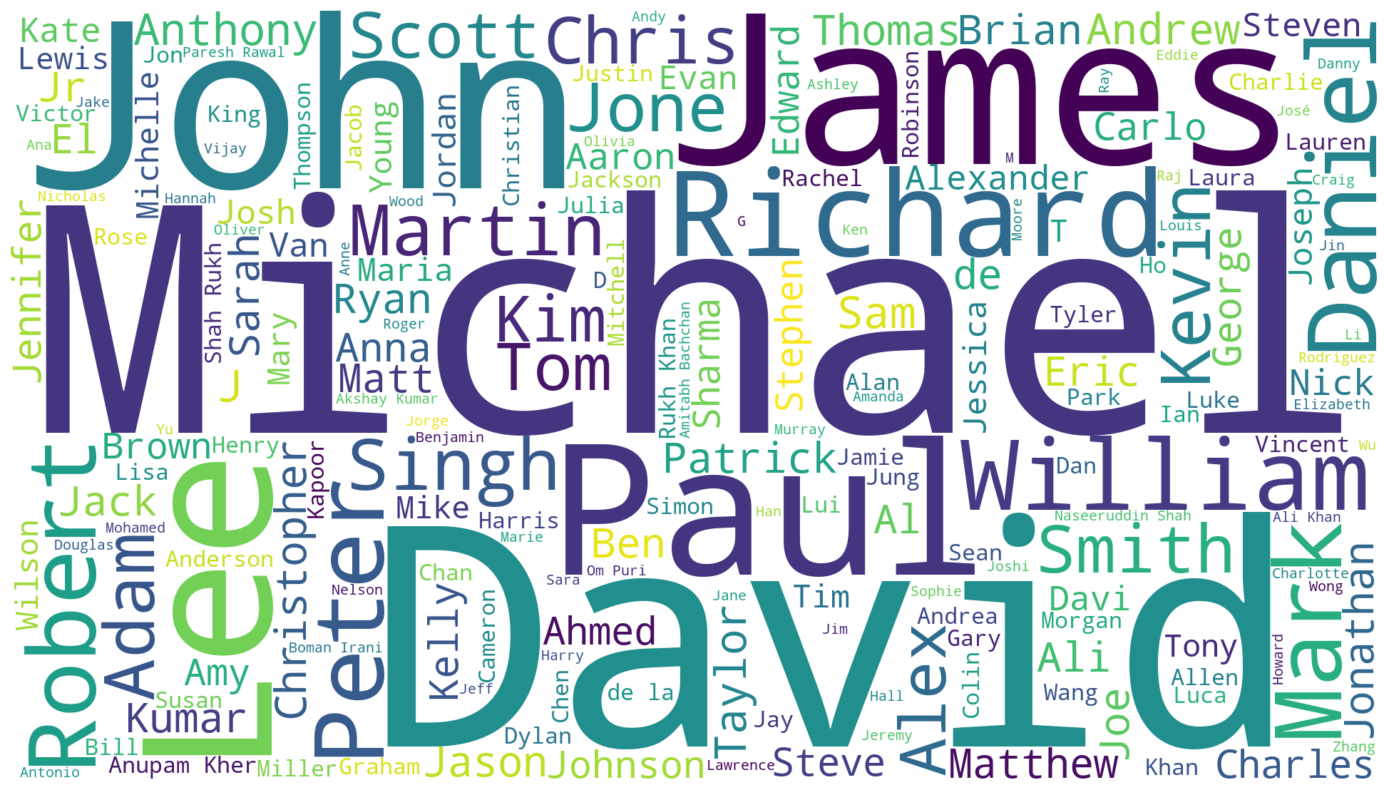

In [364]:
plt.subplots(figsize=(20, 10))
wordcloud = WordCloud(
    background_color="white",
    width=1920,
    height=1080
).generate(" ".join(data.cast))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()